# Import Relevant Modules

In [1]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 16.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
from astroquery.sdss import SDSS
from sklearn.preprocessing import LabelEncoder

# Load the Dataset

In [3]:
query = """
SELECT TOP 50000
  p.u, p.g, p.r, p.i, p.z, s.class, s.z, s.zerr
FROM PhotoObj AS p
  JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE
  p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 20
  AND s.class <> 'UNKNOWN'
  AND s.class <> 'SKY'
"""
result = SDSS.query_sql(query)
data = result.to_pandas()
df = pd.DataFrame(data)

df = df[df['zerr'] != -1.0]
df = df[df['zerr'] < 0.01]

df['u-g'] = df['u'] - df['g']
df['g-r'] = df['g'] - df['r']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']

# Encode the 'class' feature to integers
label_encoder = LabelEncoder()
df['class_encoded'] = label_encoder.fit_transform(df['class'])

df.reindex(np.random.permutation(df.index)).head()


,u,g,r,i,z,class,z1,zerr,u-g,g-r,r-i,i-z,class_encoded
24910,15.96711,14.79267,14.99139,15.15338,15.23414,STAR,-0.000939,0.000003,1.17444,-0.19872,-0.16199,-0.08076,2
19215,18.01983,17.17464,16.87385,16.76087,16.75525,STAR,-0.000317,0.000011,0.84519,0.30079,0.11298,0.00562,2
42673,16.90774,16.12458,16.87532,15.15026,14.30657,STAR,0.000045,0.000010,0.78316,-0.75074,1.72506,0.84369,2
31465,19.52673,17.80218,16.95290,16.53576,16.23294,GALAXY,0.112134,0.000038,1.72455,0.84928,0.41714,0.30282,0
1893,18.90681,16.36474,15.14532,14.63861,14.30814,STAR,0.000150,0.000008,2.54207,1.21942,0.50671,0.33047,2


# Look for missing/zero values

In [4]:
zero_percentage = (df == 0).mean() * 100
print("Percentage of zeroes in each column:")
print(zero_percentage)
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of zeroes in each column:
u                 0.000000
g                 0.000000
r                 0.000000
i                 0.000000
z                 0.000000
class             0.000000
z1                0.432545
zerr              0.432545
u-g               0.000000
g-r               0.000000
r-i               0.004005
i-z               0.000000
class_encoded    51.026293
dtype: float64
Percentage of missing values in each column:
u                0.0
g                0.0
r                0.0
i                0.0
z                0.0
class            0.0
z1               0.0
zerr             0.0
u-g              0.0
g-r              0.0
r-i              0.0
i-z              0.0
class_encoded    0.0
dtype: float64


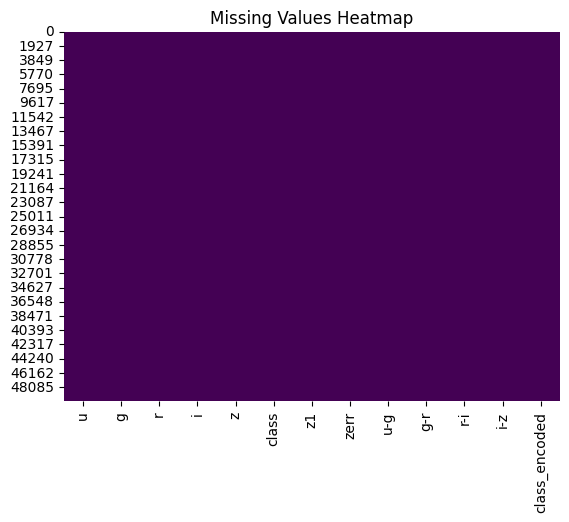

In [5]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Visualize Data

In [6]:
df.describe()

,u,g,r,i,z,z1,zerr,u-g,g-r,r-i,i-z,class_encoded
count,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000,49937.000000
mean,18.607636,17.340517,16.813821,16.558114,16.397602,0.137413,0.000035,1.267119,0.526696,0.255707,0.160512,0.896930
std,0.854043,0.996196,1.139445,1.214490,1.294686,0.386586,0.000096,0.530030,0.370097,0.286530,0.317952,0.952287
min,11.624860,9.449155,8.677709,8.142487,8.406283,-0.004022,0.000000,-2.603700,-11.655160,-13.969430,-16.641130,0.000000
25%,18.149280,16.773270,16.133710,15.805330,15.558690,-0.000112,0.000009,1.023660,0.331020,0.145950,0.053410,0.000000
50%,18.847870,17.460380,16.836250,16.550250,16.370750,0.037379,0.000012,1.267640,0.550490,0.286620,0.160960,0.000000
75%,19.269100,18.008420,17.527110,17.286040,17.163000,0.087132,0.000018,1.606980,0.778180,0.407530,0.292110,2.000000
max,19.599980,19.991480,30.757110,31.468180,30.846780,6.991177,0.003828,6.028620,4.003230,12.409120,14.120050,2.000000


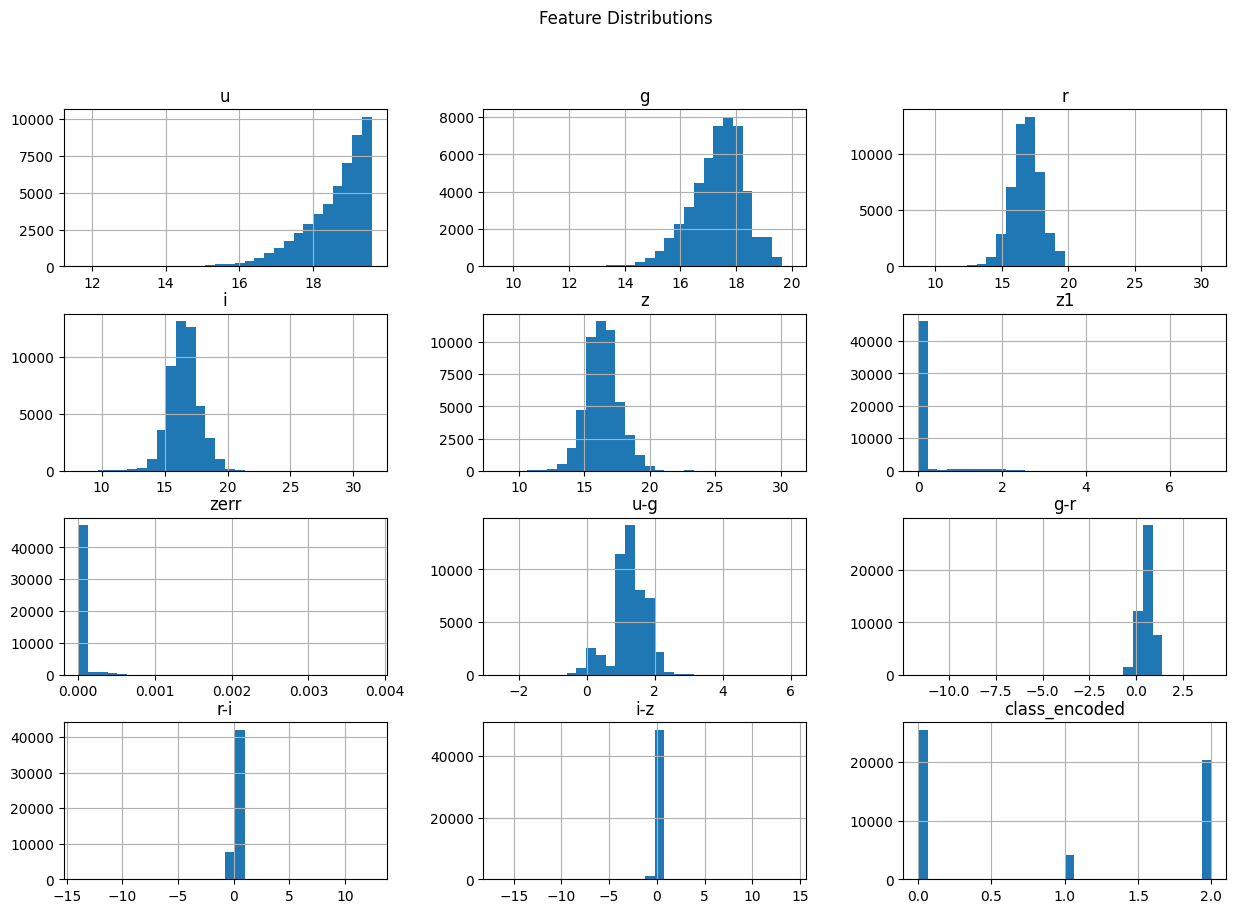

In [7]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

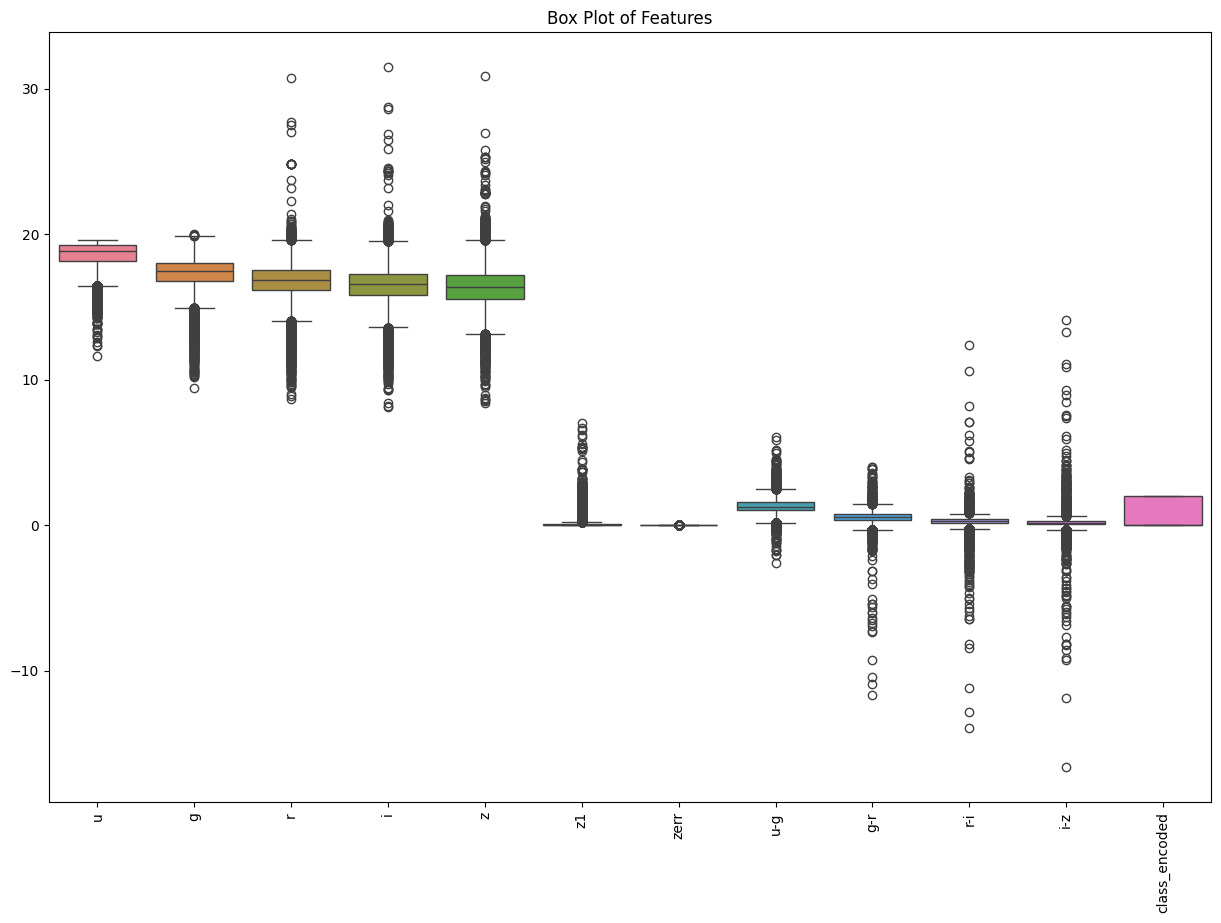

In [8]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

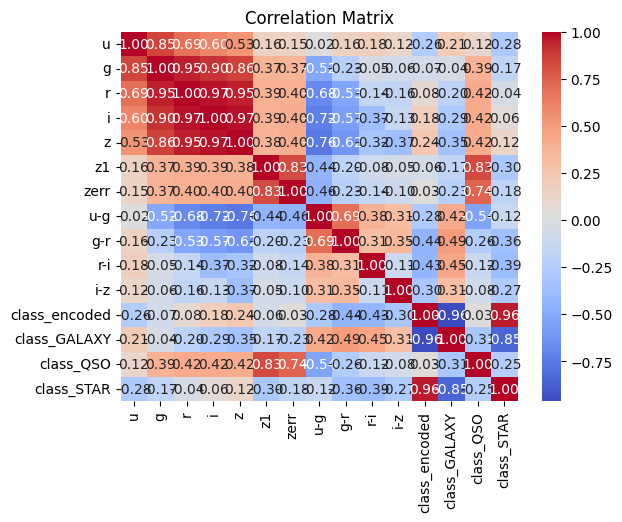

In [9]:
# Exclude non-numeric columns
data_encoded = pd.get_dummies(df, columns=['class'])

# Create the correlation matrix heatmap
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

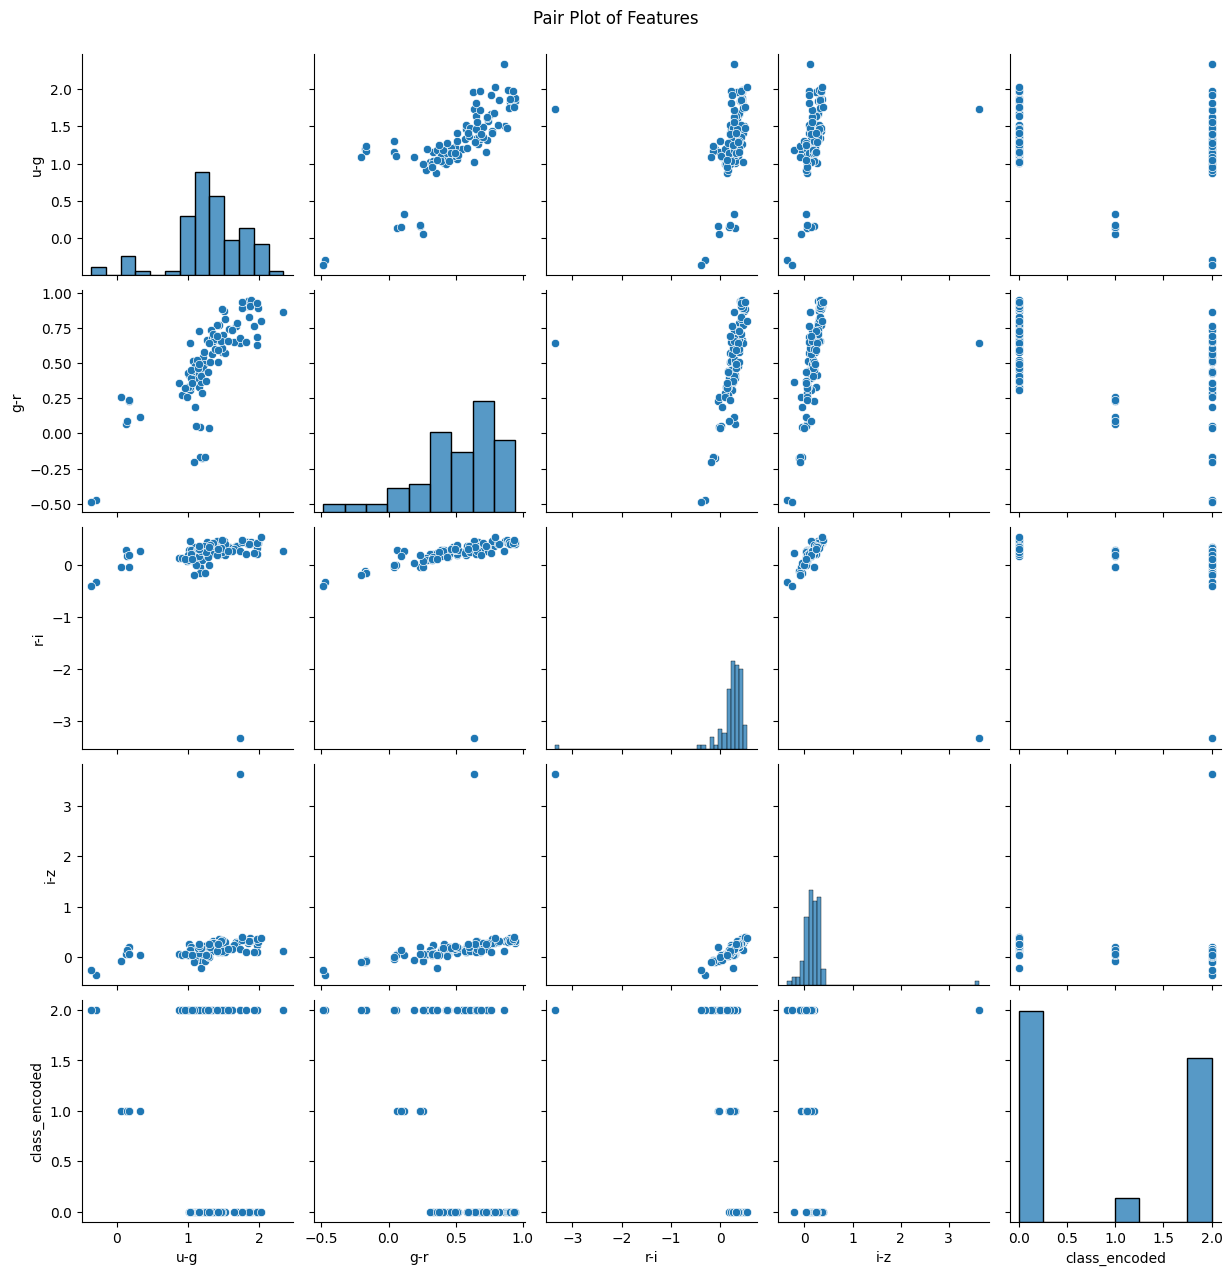

In [10]:
# Sample a subset of the data
sampled_data = data_encoded.sample(n=100, random_state=42)

# Create the pair plot with the sampled data
sns.pairplot(sampled_data[['u-g', 'g-r', 'r-i', 'i-z', 'class_encoded']])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

# Create train/test split

In [11]:
df = df.reindex(np.random.permutation(df.index))
training_set = df.iloc[:(8*len(df)//10)]
test_set = df.iloc[(8*len(df)//10):]

# Represent Data/Create Preprocessing Layers

In [12]:
inputs = {
    'u':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='u'),
    'g':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='g'),
    'r':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='r'),
    'i':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='i'),
    'z':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='z'),
    'z1':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='z1'),
    'u-g':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='u-g'),
    'g-r':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='g-r'),
    'r-i':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='r-i'),
    'i-z':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='i-z'),
}

preprocessing_layers = tf.keras.layers.Concatenate()([
    inputs.get('u'),
    inputs.get('g'),
    inputs.get('r'),
    inputs.get('i'),
    inputs.get('z'),
    inputs.get('z1'),
    inputs.get('u-g'),
    inputs.get('g-r'),
    inputs.get('r-i'),
    inputs.get('i-z')
])

# Define functions to create and train a linear regression model

In [13]:

def create_model(my_inputs, my_outputs, my_learning_rate):
  """Create and compile a simple linear regression model."""
  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.Adam(
      learning_rate=my_learning_rate),
      loss="sparse_categorical_crossentropy",
      metrics=['accuracy'])

  return model


def train_model(model, dataset, epochs, batch_size, label_name, validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, validation_split=validation_split)

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


# Define a deep neural net model

In [14]:
def get_outputs_dnn():
  dense_output = tf.keras.layers.Dense(units=256,
                              activation='relu',
                              name='hidden_dense_layer_1')(preprocessing_layers)

  dense_output = tf.keras.layers.Dense(units=128,
                              activation='relu',
                              name='hidden_dense_layer_2')(dense_output)

  dense_output = tf.keras.layers.Dropout(rate=0.2)(dense_output)

  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=3, activation='softmax')(dense_output)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }

  return outputs

# Define the plotting function

In [15]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


# Call the functions to build and train a deep neural net

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['class', 'zerr'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


11/11 [==============================] - 2s 55ms/step - loss: 1.7240 - accuracy: 0.4543 - val_loss: 0.8743 - val_accuracy: 0.5120
Epoch 2/50
11/11 [==============================] - 0s 31ms/step - loss: 0.9256 - accuracy: 0.5460 - val_loss: 0.7818 - val_accuracy: 0.5941
Epoch 3/50
11/11 [==============================] - 0s 32ms/step - loss: 0.7523 - accuracy: 0.6326 - val_loss: 0.6815 - val_accuracy: 0.6957
Epoch 4/50
11/11 [==============================] - 0s 32ms/step - loss: 0.6581 - accuracy: 0.7121 - val_loss: 0.6159 - val_accuracy: 0.7368
Epoch 5/50
11/11 [==============================] - 0s 32ms/step - loss: 0.6007 - accuracy: 0.7394 - val_loss: 0.5630 - val_accuracy: 0.7509
Epoch 6/50
11/11 [==============================] - 0s 28ms/step - loss: 0.5529 - accuracy: 0.7650 - val_loss: 0.5281 - val_accuracy: 0.7775
Epoch 7/50
11/11 [==============================] - 0s 31ms/step - loss: 0.5107 - accuracy: 0.7852 - val_loss: 0.4756 - val_accuracy: 0.8044
Epoch 8/50
11/11 [======

{'loss': 0.1077752560377121, 'accuracy': 0.970064103603363}

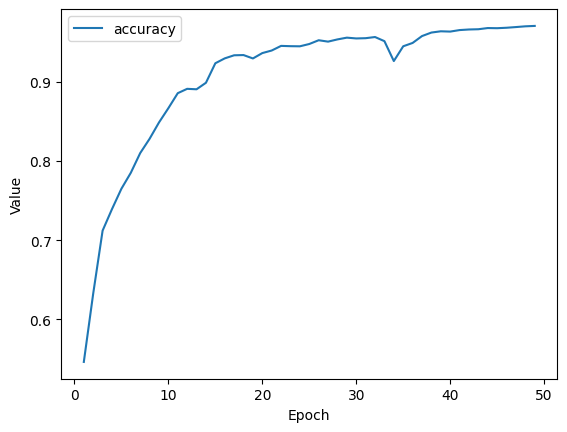

In [16]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 3000

# Specify the label
label_name = "class_encoded"

# Split the original training set into a reduced training set and a
# validation set.
validation_split = 0.2

dnn_outputs = get_outputs_dnn()

# Establish the model's topography.
my_model = create_model(
    inputs,
    dnn_outputs,
    learning_rate)

# Train the model on the training set.
epochs, history = train_model(my_model, training_set, epochs,
                                   batch_size, label_name, validation_split)

list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, history, list_of_metrics_to_plot)

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in test_set.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size, return_dict=True)

# Predictions

In [17]:
sample = {name:np.array(value) for name, value in test_set.iloc[31:32].items()}
sample.pop('class')
sample.pop('zerr')
sample.pop('class_encoded')

prediction = my_model.predict(sample)
max_index = np.argmax(prediction['dense_output'])
prediction_name = label_encoder.classes_[max_index]
print(f"Prediction: {prediction_name}")

print("Actual: ", test_set.iloc[31:32]['class'])

1/1 [==============================] - 0s 119ms/step
Prediction: GALAXY
Actual:  37088    GALAXY
Name: class, dtype: object


# Learn about the trained model

In [18]:
def model_predict(data):
    data_df = pd.DataFrame(data, columns=x_train.columns)
    data_dict = {name:np.array(value) for name, value in data_df.items()}
    predictionFuncRes = my_model.predict(data_dict)
    return predictionFuncRes['dense_output']

In [19]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.2 MB/s eta 0:00:00


In [20]:
def custom_masker(mask, x):
    return (x * mask).reshape(1, len(x))

x_train = training_set.drop(columns=['class', 'class_encoded', 'zerr'])
x_test = test_set.drop(columns=['class', 'class_encoded', 'zerr'])

explainer = shap.Explainer(model_predict, masker=custom_masker)

x_test_sample = shap.sample(x_test, 100)

shap_values = explainer(x_test_sample)

1/1 [==============================] - 0s 80ms/step


PermutationExplainer explainer:   1%|          | 1/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


PermutationExplainer explainer:   3%|▎         | 3/100 [00:39<11:04,  6.85s/it]

1/1 [==============================] - 0s 48ms/step


PermutationExplainer explainer:   4%|▍         | 4/100 [00:48<12:41,  7.93s/it]

1/1 [==============================] - 0s 28ms/step


PermutationExplainer explainer:   5%|▌         | 5/100 [00:57<12:58,  8.19s/it]

1/1 [==============================] - 0s 28ms/step


PermutationExplainer explainer:   6%|▌         | 6/100 [01:06<13:26,  8.58s/it]

1/1 [==============================] - 0s 46ms/step


PermutationExplainer explainer:   7%|▋         | 7/100 [01:15<13:29,  8.71s/it]

1/1 [==============================] - 0s 28ms/step


PermutationExplainer explainer:   8%|▊         | 8/100 [01:24<13:16,  8.66s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:   9%|▉         | 9/100 [01:33<13:26,  8.86s/it]

1/1 [==============================] - 0s 41ms/step


PermutationExplainer explainer:  10%|█         | 10/100 [01:42<13:29,  8.99s/it]

1/1 [==============================] - 0s 39ms/step


PermutationExplainer explainer:  11%|█         | 11/100 [01:51<13:09,  8.87s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  12%|█▏        | 12/100 [02:02<14:09,  9.65s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  13%|█▎        | 13/100 [02:12<13:53,  9.59s/it]

1/1 [==============================] - 0s 45ms/step


PermutationExplainer explainer:  14%|█▍        | 14/100 [02:22<13:53,  9.70s/it]

1/1 [==============================] - 0s 28ms/step


PermutationExplainer explainer:  15%|█▌        | 15/100 [02:31<13:32,  9.55s/it]

1/1 [==============================] - 0s 28ms/step


PermutationExplainer explainer:  16%|█▌        | 16/100 [02:40<13:18,  9.51s/it]

1/1 [==============================] - 0s 43ms/step


PermutationExplainer explainer:  17%|█▋        | 17/100 [02:49<12:46,  9.23s/it]

1/1 [==============================] - 0s 28ms/step


PermutationExplainer explainer:  18%|█▊        | 18/100 [02:58<12:42,  9.30s/it]

1/1 [==============================] - 0s 37ms/step


PermutationExplainer explainer:  19%|█▉        | 19/100 [03:08<12:38,  9.37s/it]

1/1 [==============================] - 0s 42ms/step


PermutationExplainer explainer:  20%|██        | 20/100 [03:17<12:21,  9.27s/it]

1/1 [==============================] - 0s 37ms/step


PermutationExplainer explainer:  21%|██        | 21/100 [03:26<12:18,  9.35s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  22%|██▏       | 22/100 [03:36<12:14,  9.42s/it]

1/1 [==============================] - 0s 28ms/step


PermutationExplainer explainer:  23%|██▎       | 23/100 [03:45<12:06,  9.44s/it]

1/1 [==============================] - 0s 33ms/step


PermutationExplainer explainer:  24%|██▍       | 24/100 [03:54<11:36,  9.17s/it]

1/1 [==============================] - 0s 28ms/step


PermutationExplainer explainer:  25%|██▌       | 25/100 [04:04<11:37,  9.29s/it]

1/1 [==============================] - 0s 28ms/step


PermutationExplainer explainer:  26%|██▌       | 26/100 [04:13<11:33,  9.37s/it]

1/1 [==============================] - 0s 42ms/step


PermutationExplainer explainer:  27%|██▋       | 27/100 [04:22<11:09,  9.17s/it]

1/1 [==============================] - 0s 31ms/step


PermutationExplainer explainer:  28%|██▊       | 28/100 [04:31<11:02,  9.20s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  29%|██▉       | 29/100 [04:41<11:07,  9.40s/it]

1/1 [==============================] - 0s 59ms/step


PermutationExplainer explainer:  30%|███       | 30/100 [04:52<11:34,  9.91s/it]

1/1 [==============================] - 0s 36ms/step


PermutationExplainer explainer:  31%|███       | 31/100 [05:02<11:24,  9.93s/it]

1/1 [==============================] - 0s 38ms/step


PermutationExplainer explainer:  32%|███▏      | 32/100 [05:12<11:16,  9.94s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  33%|███▎      | 33/100 [05:22<11:04,  9.92s/it]

1/1 [==============================] - 0s 37ms/step


PermutationExplainer explainer:  34%|███▍      | 34/100 [05:32<10:55,  9.94s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  35%|███▌      | 35/100 [05:41<10:24,  9.60s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  36%|███▌      | 36/100 [05:51<10:22,  9.72s/it]

1/1 [==============================] - 0s 31ms/step


PermutationExplainer explainer:  37%|███▋      | 37/100 [06:01<10:16,  9.79s/it]

1/1 [==============================] - 0s 49ms/step


PermutationExplainer explainer:  38%|███▊      | 38/100 [06:11<10:20, 10.00s/it]

1/1 [==============================] - 0s 32ms/step


PermutationExplainer explainer:  39%|███▉      | 39/100 [06:20<09:58,  9.81s/it]

1/1 [==============================] - 0s 31ms/step


PermutationExplainer explainer:  40%|████      | 40/100 [06:30<09:51,  9.86s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  41%|████      | 41/100 [06:40<09:42,  9.88s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  42%|████▏     | 42/100 [06:49<09:13,  9.54s/it]

1/1 [==============================] - 0s 36ms/step


PermutationExplainer explainer:  43%|████▎     | 43/100 [06:59<09:09,  9.64s/it]

1/1 [==============================] - 0s 36ms/step


PermutationExplainer explainer:  44%|████▍     | 44/100 [07:09<09:02,  9.69s/it]

1/1 [==============================] - 0s 44ms/step


PermutationExplainer explainer:  45%|████▌     | 45/100 [07:19<08:53,  9.71s/it]

1/1 [==============================] - 0s 49ms/step


PermutationExplainer explainer:  46%|████▌     | 46/100 [07:28<08:42,  9.67s/it]

1/1 [==============================] - 0s 32ms/step


PermutationExplainer explainer:  47%|████▋     | 47/100 [07:39<08:55, 10.10s/it]

1/1 [==============================] - 0s 29ms/step


PermutationExplainer explainer:  48%|████▊     | 48/100 [07:49<08:43, 10.06s/it]

1/1 [==============================] - 0s 61ms/step


PermutationExplainer explainer:  49%|████▉     | 49/100 [07:59<08:29,  9.98s/it]

1/1 [==============================] - 0s 52ms/step


PermutationExplainer explainer:  50%|█████     | 50/100 [08:08<08:04,  9.69s/it]

1/1 [==============================] - 0s 29ms/step


PermutationExplainer explainer:  51%|█████     | 51/100 [08:18<07:57,  9.73s/it]

1/1 [==============================] - 0s 31ms/step


PermutationExplainer explainer:  52%|█████▏    | 52/100 [08:28<07:50,  9.80s/it]

1/1 [==============================] - 0s 41ms/step


PermutationExplainer explainer:  53%|█████▎    | 53/100 [08:37<07:28,  9.54s/it]

1/1 [==============================] - 0s 29ms/step


PermutationExplainer explainer:  54%|█████▍    | 54/100 [08:46<07:20,  9.59s/it]

1/1 [==============================] - 0s 35ms/step


PermutationExplainer explainer:  55%|█████▌    | 55/100 [08:57<07:24,  9.88s/it]

1/1 [==============================] - 0s 39ms/step


PermutationExplainer explainer:  56%|█████▌    | 56/100 [09:07<07:16,  9.93s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  57%|█████▋    | 57/100 [09:16<06:52,  9.59s/it]

1/1 [==============================] - 0s 28ms/step


PermutationExplainer explainer:  58%|█████▊    | 58/100 [09:26<06:48,  9.73s/it]

1/1 [==============================] - 0s 29ms/step


PermutationExplainer explainer:  59%|█████▉    | 59/100 [09:36<06:40,  9.78s/it]

1/1 [==============================] - 0s 50ms/step


PermutationExplainer explainer:  60%|██████    | 60/100 [09:45<06:29,  9.74s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  61%|██████    | 61/100 [09:55<06:14,  9.59s/it]

1/1 [==============================] - 0s 32ms/step


PermutationExplainer explainer:  62%|██████▏   | 62/100 [10:05<06:08,  9.68s/it]

1/1 [==============================] - 0s 31ms/step


PermutationExplainer explainer:  63%|██████▎   | 63/100 [10:14<05:59,  9.72s/it]

1/1 [==============================] - 0s 91ms/step


PermutationExplainer explainer:  64%|██████▍   | 64/100 [10:27<06:21, 10.60s/it]

1/1 [==============================] - 0s 40ms/step


PermutationExplainer explainer:  65%|██████▌   | 65/100 [10:37<06:06, 10.49s/it]

1/1 [==============================] - 0s 29ms/step


PermutationExplainer explainer:  66%|██████▌   | 66/100 [10:47<05:50, 10.32s/it]

1/1 [==============================] - 0s 31ms/step


PermutationExplainer explainer:  67%|██████▋   | 67/100 [10:57<05:36, 10.21s/it]

1/1 [==============================] - 0s 53ms/step


PermutationExplainer explainer:  68%|██████▊   | 68/100 [11:06<05:14,  9.84s/it]

1/1 [==============================] - 0s 29ms/step


PermutationExplainer explainer:  69%|██████▉   | 69/100 [11:16<05:05,  9.84s/it]

1/1 [==============================] - 0s 29ms/step


PermutationExplainer explainer:  70%|███████   | 70/100 [11:26<04:56,  9.88s/it]

1/1 [==============================] - 0s 46ms/step


PermutationExplainer explainer:  71%|███████   | 71/100 [11:36<04:45,  9.84s/it]

1/1 [==============================] - 0s 34ms/step


PermutationExplainer explainer:  72%|███████▏  | 72/100 [11:45<04:35,  9.83s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  73%|███████▎  | 73/100 [11:56<04:28,  9.93s/it]

1/1 [==============================] - 0s 32ms/step


PermutationExplainer explainer:  74%|███████▍  | 74/100 [12:06<04:19,  9.98s/it]

1/1 [==============================] - 0s 50ms/step


PermutationExplainer explainer:  75%|███████▌  | 75/100 [12:15<04:05,  9.81s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  76%|███████▌  | 76/100 [12:25<03:53,  9.73s/it]

1/1 [==============================] - 0s 33ms/step


PermutationExplainer explainer:  77%|███████▋  | 77/100 [12:34<03:44,  9.75s/it]

1/1 [==============================] - 0s 29ms/step


PermutationExplainer explainer:  78%|███████▊  | 78/100 [12:45<03:36,  9.84s/it]

1/1 [==============================] - 0s 32ms/step


PermutationExplainer explainer:  79%|███████▉  | 79/100 [12:53<03:20,  9.54s/it]

1/1 [==============================] - 0s 31ms/step


PermutationExplainer explainer:  80%|████████  | 80/100 [13:03<03:13,  9.67s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  81%|████████  | 81/100 [13:14<03:11, 10.07s/it]

1/1 [==============================] - 0s 100ms/step


PermutationExplainer explainer:  82%|████████▏ | 82/100 [13:25<03:02, 10.11s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  83%|████████▎ | 83/100 [13:35<02:52, 10.16s/it]

1/1 [==============================] - 0s 31ms/step


PermutationExplainer explainer:  84%|████████▍ | 84/100 [13:45<02:42, 10.15s/it]

1/1 [==============================] - 0s 33ms/step


PermutationExplainer explainer:  85%|████████▌ | 85/100 [13:55<02:32, 10.14s/it]

1/1 [==============================] - 0s 42ms/step


PermutationExplainer explainer:  86%|████████▌ | 86/100 [14:04<02:17,  9.82s/it]

1/1 [==============================] - 0s 38ms/step


PermutationExplainer explainer:  87%|████████▋ | 87/100 [14:14<02:07,  9.84s/it]

1/1 [==============================] - 0s 42ms/step


PermutationExplainer explainer:  88%|████████▊ | 88/100 [14:24<01:58,  9.89s/it]

1/1 [==============================] - 0s 31ms/step


PermutationExplainer explainer:  89%|████████▉ | 89/100 [14:35<01:51, 10.11s/it]

1/1 [==============================] - 0s 32ms/step


PermutationExplainer explainer:  90%|█████████ | 90/100 [14:44<01:38,  9.82s/it]

1/1 [==============================] - 0s 39ms/step


PermutationExplainer explainer:  91%|█████████ | 91/100 [14:54<01:29,  9.93s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  92%|█████████▏| 92/100 [15:04<01:20, 10.01s/it]

1/1 [==============================] - 0s 47ms/step


PermutationExplainer explainer:  93%|█████████▎| 93/100 [15:14<01:09, 10.00s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  94%|█████████▍| 94/100 [15:23<00:58,  9.68s/it]

1/1 [==============================] - 0s 30ms/step


PermutationExplainer explainer:  95%|█████████▌| 95/100 [15:33<00:49,  9.85s/it]

1/1 [==============================] - 0s 29ms/step


PermutationExplainer explainer:  96%|█████████▌| 96/100 [15:43<00:39,  9.88s/it]

1/1 [==============================] - 0s 42ms/step


PermutationExplainer explainer:  97%|█████████▋| 97/100 [15:52<00:28,  9.65s/it]

1/1 [==============================] - 0s 33ms/step


PermutationExplainer explainer:  98%|█████████▊| 98/100 [16:03<00:19,  9.96s/it]

1/1 [==============================] - 0s 31ms/step


PermutationExplainer explainer:  99%|█████████▉| 99/100 [16:13<00:10, 10.00s/it]

1/1 [==============================] - 0s 52ms/step


PermutationExplainer explainer: 100%|██████████| 100/100 [16:24<00:00, 10.19s/it]

1/1 [==============================] - 0s 43ms/step


PermutationExplainer explainer: 101it [16:34,  9.94s/it]


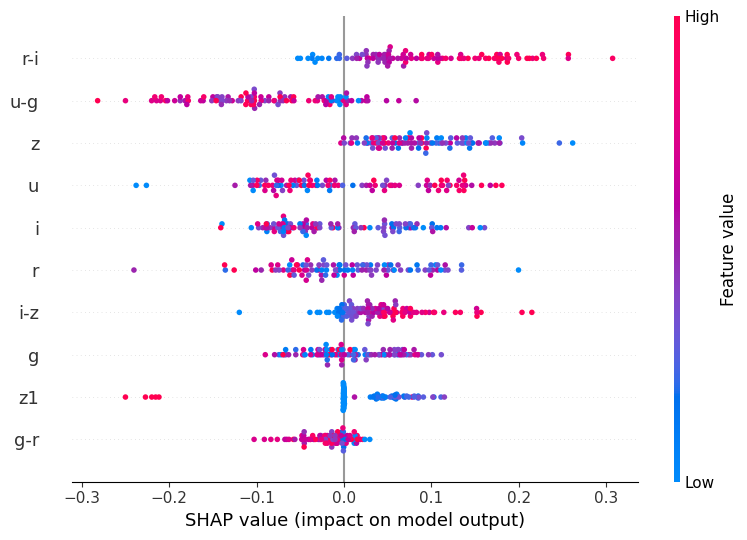

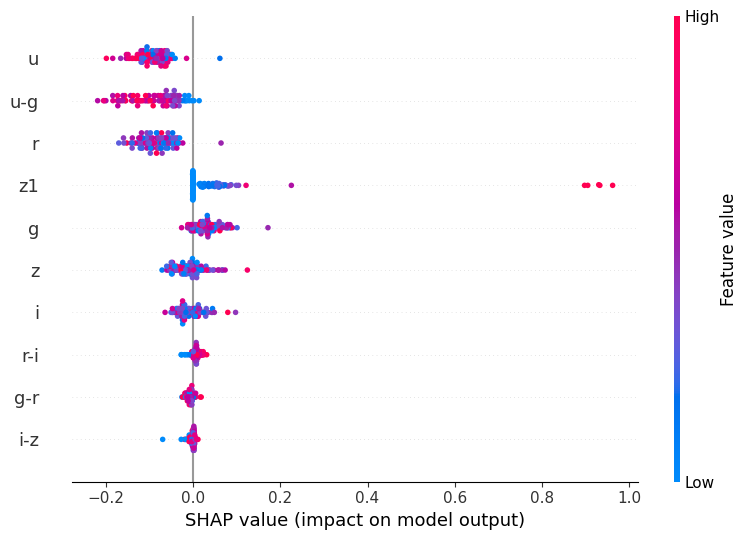

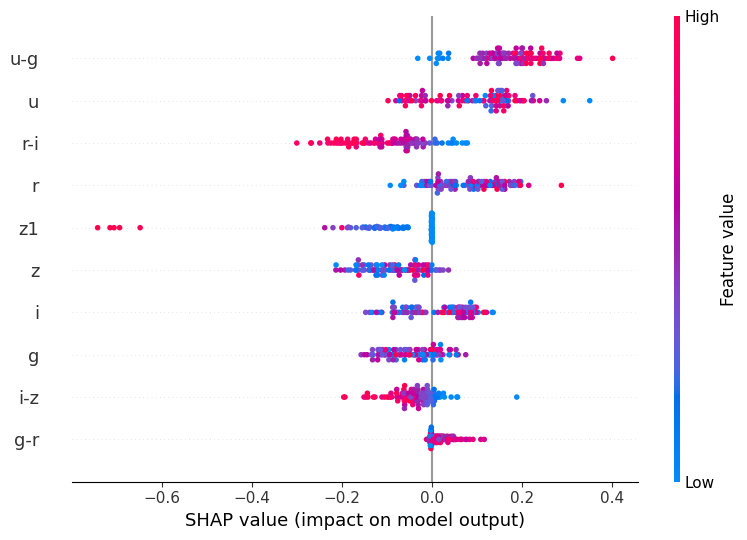

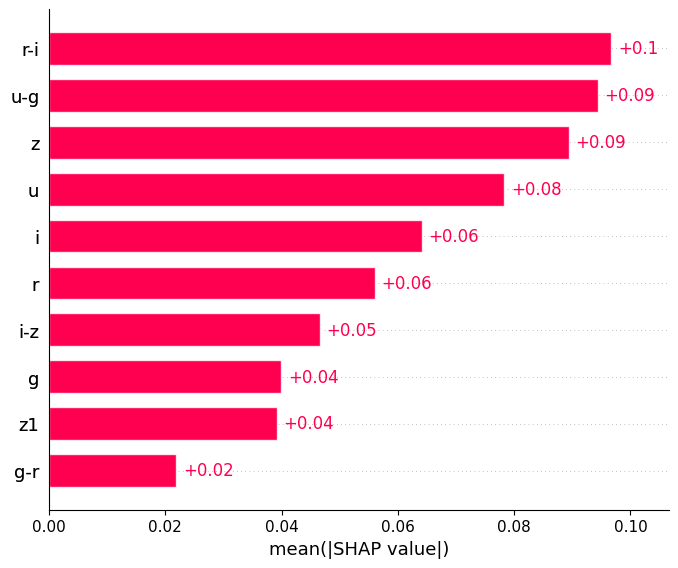

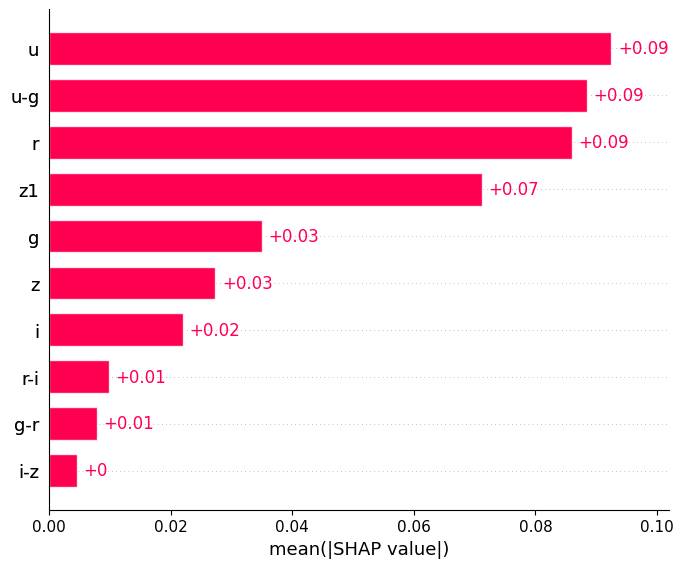

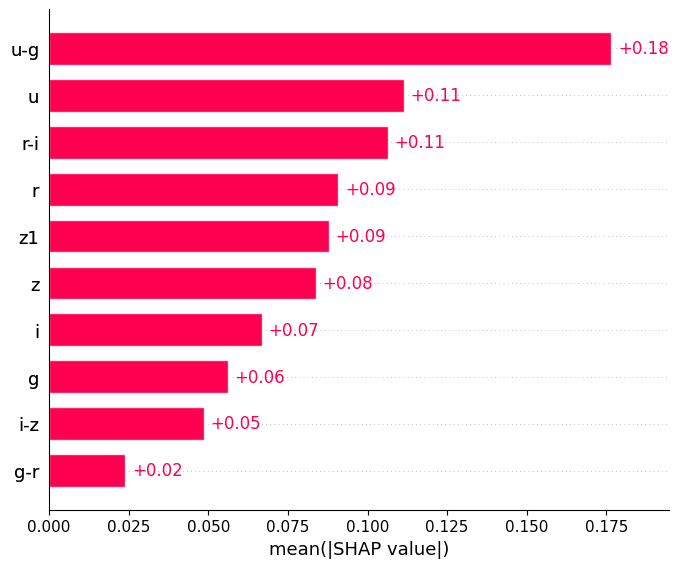

In [21]:
shap.summary_plot(shap_values.values[:,:,0], x_test_sample)
shap.summary_plot(shap_values.values[:,:,1], x_test_sample)
shap.summary_plot(shap_values.values[:,:,2], x_test_sample)

shap.plots.bar(shap_values[:,:,0])
shap.plots.bar(shap_values[:,:,1])
shap.plots.bar(shap_values[:,:,2])

# Loading my trained model
### I have used this notebook to train a model with ~97% accuracy and 0.11 loss. The following code will be for you to load in the model I trained, along with SHAP values calculated with that model, and the dataset compiled into a .csv.

In [22]:
#@title Load trained model
# !unzip my_model.zip -d my_model
# model = tf.keras.saving.load_model('my_model')

In [23]:
#@title Load SHAP values derived from loaded model
# loaded_shap_values = np.load('shap_values.npy')

In [35]:
#@title Load data from csv
# loaded_training_set = pd.read_csv('trainingset.csv')
# loaded_test_set = pd.read_csv('testset.csv')

In [34]:
#@title Example prediction
# sample = {name:np.array(value) for name, value in loaded_test_set.iloc[31:32].items()}
# sample.pop('class')
# sample.pop('zerr')
# sample.pop('class_encoded')

# prediction = model.predict(sample)
# max_index = np.argmax(prediction['dense_output'])
# prediction_name = ['GALAXY', 'QSO', 'STAR'][max_index]
# print(f"Prediction: {prediction_name}")
# print("Actual: ", loaded_test_set.iloc[31:32]['class'])